In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loaded the dataset
df = pd.read_csv("/content/merged_dataset.csv")

# Displayed column names
print("Column names:", df.columns.tolist())

# Filtered columns to create a dataset with only the columns of interest
subset_cols = ['Country_Year'] + [col for col in df.columns if 'rural development' in col.lower() or 'emission' in col.lower()]
df_subset = df[subset_cols]

df_subset.columns = ['Country_Year','CO2_Total', 'N2O_Total', 'CH4_Total', 'Population Density', 'Population Percent', 'Population Percent Growth']

# Dropped rows with missing values
df_clean = df_subset.dropna()

# Displayed first few rows
print(df_clean.head(2))

df_clean.to_csv('df_clean.csv', index=False)

Column names: ['Unnamed: 0', 'Country_Year', 'Data.Health.Birth Rate', 'Data.Health.Death Rate', 'Data.Health.Fertility Rate', 'Data.Health.Life Expectancy at Birth, Female', 'Data.Health.Life Expectancy at Birth, Male', 'Data.Health.Life Expectancy at Birth, Total', 'Data.Health.Population Growth', 'Data.Infrastructure.Mobile Cellular Subscriptions', 'Data.Infrastructure.Mobile Cellular Subscriptions per 100 People', 'Data.Infrastructure.Telephone Lines', 'Data.Infrastructure.Telephone Lines per 100 People', 'Data.Rural Development.Agricultural Land', 'Data.Rural Development.Agricultural Land Percent', 'Data.Rural Development.Arable Land', 'Data.Rural Development.Arable Land Percent', 'Data.Rural Development.Land Area', 'Data.Rural Development.Rural Population', 'Data.Rural Development.Rural Population Growth', 'Data.Rural Development.Surface Area', 'Data.Urban Development.Population Density', 'Data.Urban Development.Urban Population Percent', 'Data.Urban Development.Urban Population 

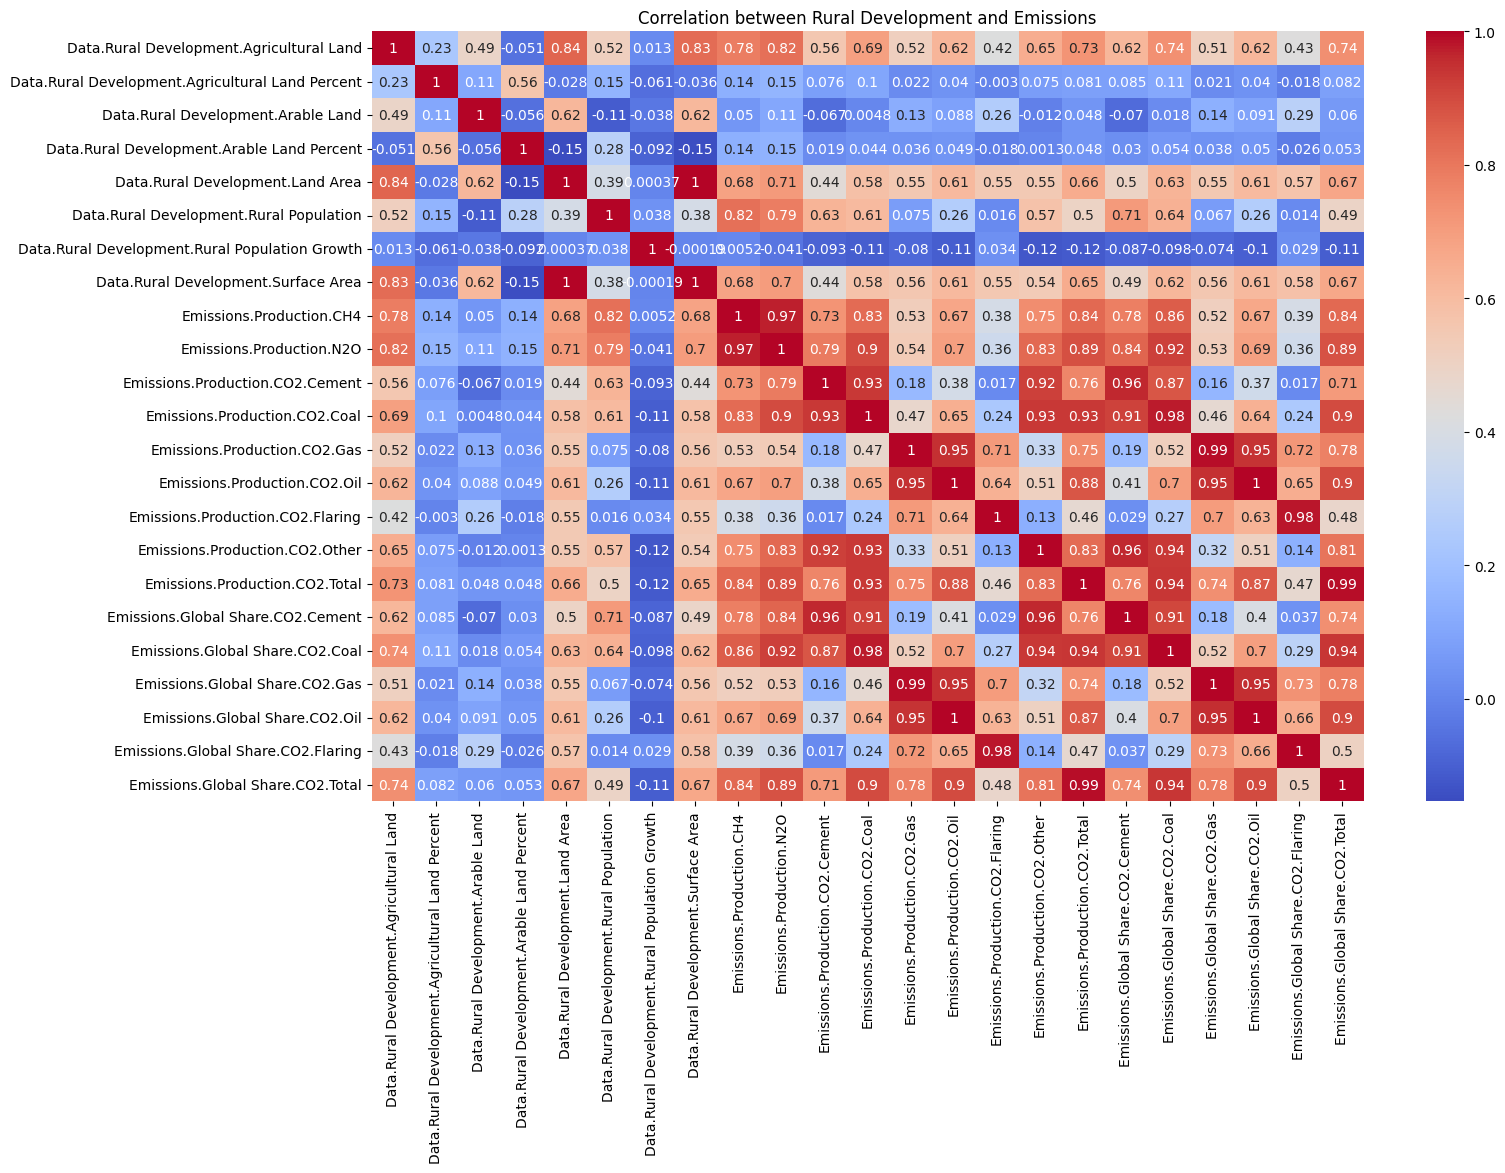

In [ ]:
#Created heatmap to show correlations between Rural development variables and Emissions variables
plt.figure(figsize=(16, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Rural Development and Emissions')
plt.show()



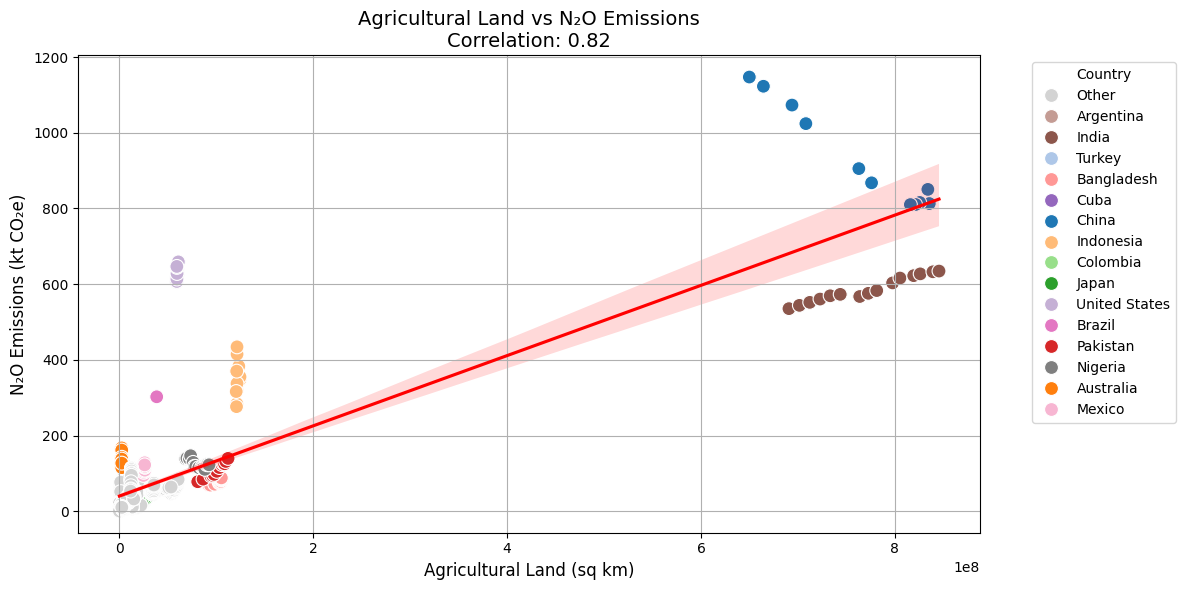

In [ ]:
# Defined the variables to visualize
x_var = 'Data.Rural Development.Rural Population'
y_var_n2o = 'Emissions.Production.CH4'

# Extracted country names from the Country_Year vairiable
df['Country'] = df['Country_Year'].str.split('_').str[0]

# Specified the countries to highlight in the scatter plot
highlight_countries = [
    "China", "Turkey", "Australia", "Indonesia", "Japan",
    "Colombia", "Pakistan", "Bangladesh", "Cuba",
    "United States", "India", "Argentina", "Brazil", "Mexico", "Nigeria"
]

# Created a new column for color grouping
df['Color_Group'] = df['Country'].where(df['Country'].isin(highlight_countries), 'Other')

# Assigned distinct colors to the selected countries and gray for the others
palette_colors = sns.color_palette('tab20', n_colors=len(highlight_countries))
palette = {country: color for country, color in zip(highlight_countries, palette_colors)}
palette['Other'] = 'lightgray'

# Created Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_var, y=y_var_n2o, hue='Color_Group', palette=palette, s=100)

# Added a regression line
sns.regplot(data=df, x=x_var, y=y_var_n2o, scatter=False, line_kws={"color": "red"})

# Calculated the correlation between the variables
corr_n2o, _ = pearsonr(df[x_var].dropna(), df[y_var_n2o].dropna())

# Created the title and labels
plt.title(f'Agricultural Land vs N₂O Emissions\nCorrelation: {corr_n2o:.2f}', fontsize=14)
plt.xlabel('Agricultural Land (sq km)', fontsize=12)
plt.ylabel('N₂O Emissions (kt CO₂e)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Moved legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-6-597757e99701>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_corrs.index, y=country_corrs.values, palette="coolwarm")


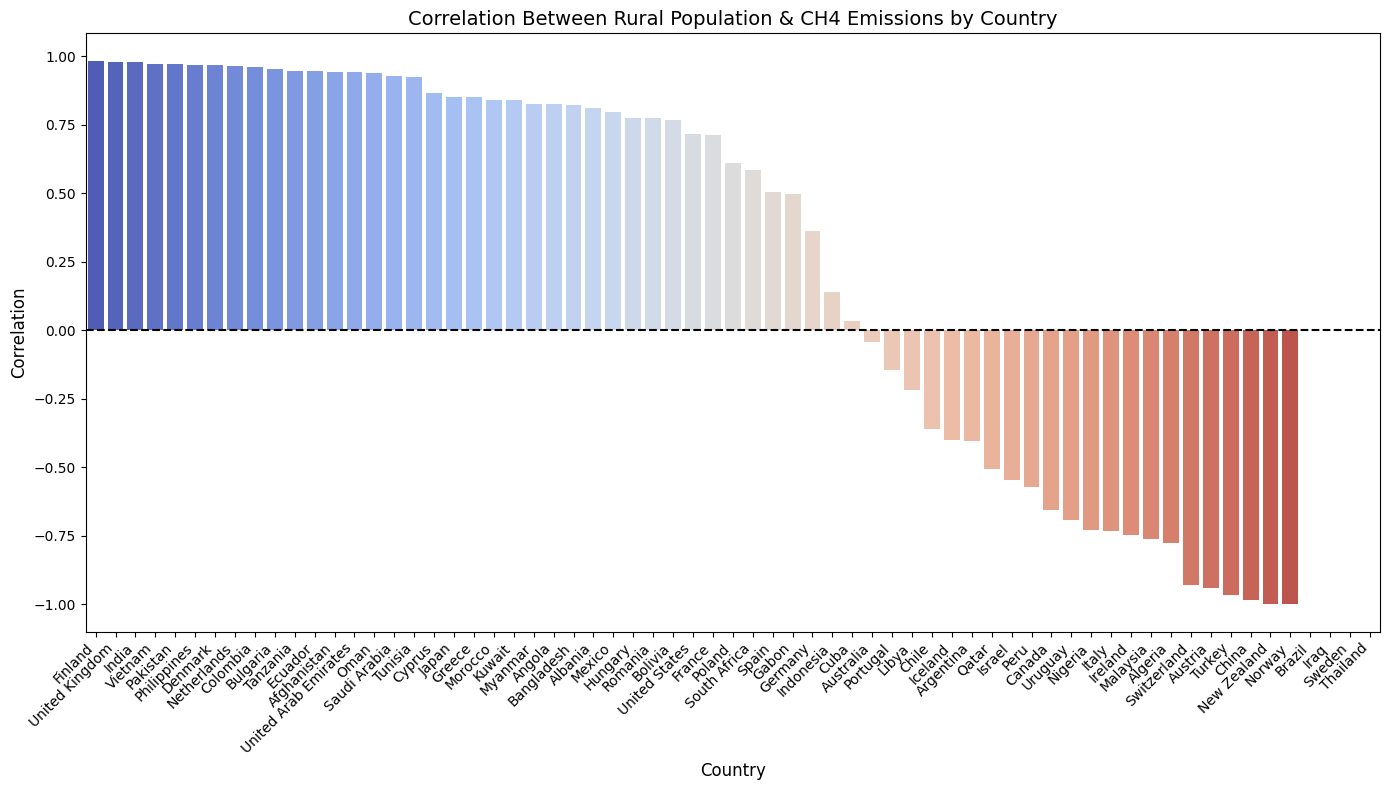

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract Country from 'Country_Year' variable
df['Country'] = df['Country_Year'].str.split('_').str[0]  # Extract country name
df['Year'] = df['Country_Year'].str.split('_').str[1].astype(int)  # Extract year as integer

#Computed the correlation between rural population and CH4 emissions for each country
country_corrs = df.groupby('Country')[['Data.Rural Development.Rural Population', 'Emissions.Production.CH4']].corr().unstack().iloc[:, 1]

#Sorted correlations to make the visualization more readable
country_corrs = country_corrs.sort_values(ascending=False)

# Plotted the Grouped Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(x=country_corrs.index, y=country_corrs.values, palette="coolwarm")

# Created titles and labels
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate labels by 45 degrees and adjust font size
plt.xlabel("Country", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.title("Correlation Between Rural Population & CH4 Emissions by Country", fontsize=14)

# Added a reference line at 0 to make the bar chart more readable
plt.axhline(0, color="black", linestyle="--")

plt.tight_layout()
plt.show()